## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 22ms/step - loss: 2.2734 - accuracy: 0.1394 - val_loss: 2.2233 - val_accuracy: 0.1811
Epoch 2/500
196/196 [==============================] - 4s 20ms/step - loss: 2.1900 - accuracy: 0.2061 - val_loss: 2.1569 - val_accuracy: 0.2292
Epoch 3/500
196/196 [==============================] - 4s 21ms/step - loss: 2.1333 - accuracy: 0.2403 - val_loss: 2.1054 - val_accuracy: 0.2589
Epoch 4/500
196/196 [==============================] - 4s 21ms/step - loss: 2.0879 - accuracy: 0.2639 - val_loss: 2.0643 - val_accuracy: 0.2750
Epoch 5/500
196/196 [==============================] - 4s 22ms/step - loss: 2.0516 - accuracy: 0.2804 - val_loss: 2.0311 - val_accuracy: 0.2923
Epoch 6/500
196/196 [==============================] - 4s 21ms/step - loss: 2.0214 - accuracy: 0.2940 - val_loss: 2.0041 - val_accuracy: 0.2997
Epoch 7/500
196/196 [==============================] - 4s 23ms/step - loss: 1.9959 - accuracy: 0.3051 - val_loss: 1.9798 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.6567 - accuracy: 0.4226 - val_loss: 1.6620 - val_accuracy: 0.4187
Epoch 58/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6537 - accuracy: 0.4250 - val_loss: 1.6575 - val_accuracy: 0.4209
Epoch 59/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6504 - accuracy: 0.4255 - val_loss: 1.6558 - val_accuracy: 0.4233
Epoch 60/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6478 - accuracy: 0.4253 - val_loss: 1.6522 - val_accuracy: 0.4231
Epoch 61/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6445 - accuracy: 0.4278 - val_loss: 1.6523 - val_accuracy: 0.4200
Epoch 62/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6418 - accuracy: 0.4264 - val_loss: 1.6467 - val_accuracy: 0.4247
Epoch 63/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6387 - accuracy: 0.4302 - val_loss: 1.6443 - val_accuracy: 0.424

196/196 [==============================] - 4s 22ms/step - loss: 1.5230 - accuracy: 0.4703 - val_loss: 1.5489 - val_accuracy: 0.4529
Epoch 114/500
196/196 [==============================] - 4s 20ms/step - loss: 1.5216 - accuracy: 0.4700 - val_loss: 1.5456 - val_accuracy: 0.4512
Epoch 115/500
196/196 [==============================] - 4s 21ms/step - loss: 1.5194 - accuracy: 0.4706 - val_loss: 1.5459 - val_accuracy: 0.4568
Epoch 116/500
196/196 [==============================] - 4s 20ms/step - loss: 1.5176 - accuracy: 0.4713 - val_loss: 1.5412 - val_accuracy: 0.4575
Epoch 117/500
196/196 [==============================] - 4s 21ms/step - loss: 1.5159 - accuracy: 0.4714 - val_loss: 1.5490 - val_accuracy: 0.4541
Epoch 118/500
196/196 [==============================] - 4s 21ms/step - loss: 1.5142 - accuracy: 0.4730 - val_loss: 1.5372 - val_accuracy: 0.4626
Epoch 119/500
196/196 [==============================] - 4s 21ms/step - loss: 1.5125 - accuracy: 0.4739 - val_loss: 1.5393 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.4300 - accuracy: 0.5010 - val_loss: 1.4852 - val_accuracy: 0.4736
Epoch 170/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4287 - accuracy: 0.5021 - val_loss: 1.4765 - val_accuracy: 0.4775
Epoch 171/500
196/196 [==============================] - 4s 21ms/step - loss: 1.4274 - accuracy: 0.5013 - val_loss: 1.4735 - val_accuracy: 0.4763
Epoch 172/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4254 - accuracy: 0.5032 - val_loss: 1.4734 - val_accuracy: 0.4800
Epoch 173/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4241 - accuracy: 0.5029 - val_loss: 1.4720 - val_accuracy: 0.4793
Epoch 174/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4227 - accuracy: 0.5035 - val_loss: 1.4709 - val_accuracy: 0.4777
Epoch 175/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4214 - accuracy: 0.5041 - val_loss: 1.4694 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.3517 - accuracy: 0.5285 - val_loss: 1.4278 - val_accuracy: 0.4967
Epoch 226/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3500 - accuracy: 0.5290 - val_loss: 1.4355 - val_accuracy: 0.4938
Epoch 227/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3492 - accuracy: 0.5291 - val_loss: 1.4224 - val_accuracy: 0.4998
Epoch 228/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3476 - accuracy: 0.5308 - val_loss: 1.4269 - val_accuracy: 0.4964
Epoch 229/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3462 - accuracy: 0.5288 - val_loss: 1.4229 - val_accuracy: 0.4982
Epoch 230/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3454 - accuracy: 0.5298 - val_loss: 1.4268 - val_accuracy: 0.4959
Epoch 231/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3443 - accuracy: 0.5305 - val_loss: 1.4430 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.2834 - accuracy: 0.5514 - val_loss: 1.4244 - val_accuracy: 0.5007
Epoch 282/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2819 - accuracy: 0.5504 - val_loss: 1.3962 - val_accuracy: 0.5068
Epoch 283/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2809 - accuracy: 0.5511 - val_loss: 1.3869 - val_accuracy: 0.5111
Epoch 284/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2792 - accuracy: 0.5523 - val_loss: 1.3890 - val_accuracy: 0.5142
Epoch 285/500
196/196 [==============================] - 5s 23ms/step - loss: 1.2783 - accuracy: 0.5518 - val_loss: 1.3933 - val_accuracy: 0.5076
Epoch 286/500
196/196 [==============================] - 4s 23ms/step - loss: 1.2774 - accuracy: 0.5534 - val_loss: 1.4333 - val_accuracy: 0.5014
Epoch 287/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2766 - accuracy: 0.5532 - val_loss: 1.3875 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.2209 - accuracy: 0.5743 - val_loss: 1.3780 - val_accuracy: 0.5116
Epoch 338/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2202 - accuracy: 0.5741 - val_loss: 1.3775 - val_accuracy: 0.5120
Epoch 339/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2195 - accuracy: 0.5733 - val_loss: 1.3641 - val_accuracy: 0.5206
Epoch 340/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2188 - accuracy: 0.5738 - val_loss: 1.3655 - val_accuracy: 0.5178
Epoch 341/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2167 - accuracy: 0.5749 - val_loss: 1.3656 - val_accuracy: 0.5187
Epoch 342/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2154 - accuracy: 0.5750 - val_loss: 1.3597 - val_accuracy: 0.5190
Epoch 343/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2159 - accuracy: 0.5746 - val_loss: 1.3655 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.1630 - accuracy: 0.5942 - val_loss: 1.3543 - val_accuracy: 0.5220
Epoch 394/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1613 - accuracy: 0.5931 - val_loss: 1.3458 - val_accuracy: 0.5199
Epoch 395/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1603 - accuracy: 0.5940 - val_loss: 1.3440 - val_accuracy: 0.5243
Epoch 396/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1591 - accuracy: 0.5953 - val_loss: 1.3667 - val_accuracy: 0.5159
Epoch 397/500
196/196 [==============================] - 4s 23ms/step - loss: 1.1579 - accuracy: 0.5951 - val_loss: 1.3693 - val_accuracy: 0.5181
Epoch 398/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1573 - accuracy: 0.5957 - val_loss: 1.3428 - val_accuracy: 0.5252
Epoch 399/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1566 - accuracy: 0.5943 - val_loss: 1.3700 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.1085 - accuracy: 0.6120 - val_loss: 1.3424 - val_accuracy: 0.5199
Epoch 450/500
196/196 [==============================] - 4s 23ms/step - loss: 1.1066 - accuracy: 0.6151 - val_loss: 1.3480 - val_accuracy: 0.5227
Epoch 451/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1051 - accuracy: 0.6143 - val_loss: 1.3617 - val_accuracy: 0.5177
Epoch 452/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1031 - accuracy: 0.6162 - val_loss: 1.3861 - val_accuracy: 0.5117
Epoch 453/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1042 - accuracy: 0.6147 - val_loss: 1.3702 - val_accuracy: 0.5197
Epoch 454/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1048 - accuracy: 0.6135 - val_loss: 1.3905 - val_accuracy: 0.5077
Epoch 455/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1017 - accuracy: 0.6130 - val_loss: 1.3511 - val_accuracy:

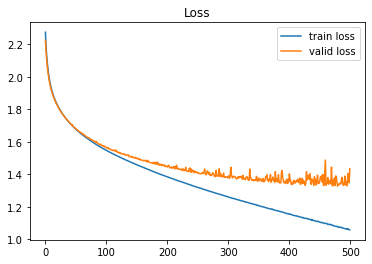

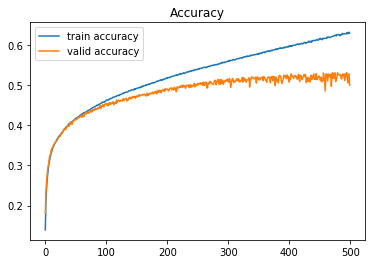

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()